# MNIST HANDWRITING

Deep Learning for MNIST Handwritten Digit Classification using PyTorch.
This is an exploration task. Develop your end-to-end workflow for solving
a Handwritten Digit Classification task using Neural Network architecture
(not Convolutional Neural Network). These are the criteria for scoring:


In [15]:
#Import all libraries
import torch as t
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

###1. Loading your MNIST dataset for the data loader

In [16]:
# Step 1: Load MNIST dataset for the data loader
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

mnist_trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(mnist_trainset, batch_size=64, shuffle=True)

mnist_testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(mnist_testset, batch_size=64, shuffle=False)


###2. Visualize several MNIST datasets

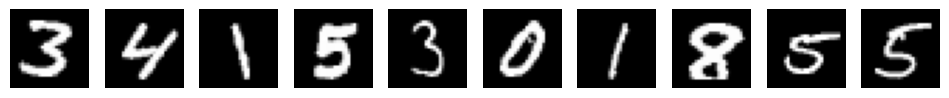

In [17]:
# Step 2: Visualize several MNIST datasets

import matplotlib.pyplot as plt
%matplotlib inline

#define a functon to plot images
def plot_images(images):
  fig, axs = plt.subplots(1, len(images), figsize=(12, 6))
  for i, image in enumerate(images):
    axs[i].imshow(image.squeeze().numpy(), cmap='gray')
    axs[i].axis('off')

#get some images
images, labels = next(iter(train_loader))
plot_images(images[:10])

###3. Design your Neural Network model

ReLU Activation Function

In [18]:
class ModelReLU(nn.Module):
  def __init__(self):
    super(ModelReLU, self).__init__()
    self.linear1 = nn.Linear(28*28, 100)
    self.linear2 = nn.Linear(100, 50)
    self.final = nn.Linear(50, 10)
    self.relu = nn.ReLU()

  def forward(self, img):
    x = img.view(-1, 28*28)
    x = self.relu(self.linear1(x))
    x = self.relu(self.linear2(x))
    x = self.final(x)
    return x


Sigmoid Activation Function

In [19]:
class ModelSigmoid(nn.Module):
  def __init__(self):
    super(ModelSigmoid, self).__init__()
    self.linear1 = nn.Linear(28*28, 128)
    self.linear2 = nn.Linear(128, 10)

  def forward(self, img):
    x = img.view(-1, 28*28)
    x = t.sigmoid(self.linear1(x))
    x = self.linear2(x)
    return x


SOftmax Activation Function

In [20]:
class ModelSoftmax(nn.Module):
  def __init__(self):
    super(ModelSoftmax, self).__init__()
    self.linear1 = nn.Linear(28*28, 128)
    self.linear2 = nn.Linear(128, 10)

  def forward(self, img):
    x = img.view(-1, 28*28)
    x = self.linear1(x)
    x = t.softmax(x, dim=1)
    x = self.linear2(x)
    return x


###4. Setup your hyperparameter such as Loss Function, Optimizer, Learning Rate, etc

In [21]:
cross_el = nn.CrossEntropyLoss()
num_epochs = 5
momentum = 0.9
learning_rate = 0.01

###5. Develop a training loop and run a training model

In [22]:
models = [ModelReLU(), ModelSigmoid(), ModelSoftmax()]
accuracies = []

for i, model in enumerate(models):
  print(f"Model {i + 1}")
  optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)

  for epoch in range(num_epochs):
    running_loss = 0.0
    for j, data in enumerate(train_loader, 0):
      inputs, labels = data

      optimizer.zero_grad()

      outputs = model(inputs)
      loss = cross_el(outputs, labels)
      loss.backward()
      optimizer.step()

      running_loss += loss.item()
      if j % 100 == 99 :
        print(f"[{epoch+1}, {j+1}] loss : {running_loss/100:.3f}")
        running_loss = 0.0

  correct = 0
  total = 0
  with t.no_grad():
    for data in test_loader:
      images, labels = data
      outputs = model(images)
      _, predicted = t.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()

  accuracy = 100 * correct / total
  print(f"accuracy : {accuracy}%")
  accuracies.append(accuracy)

print("accuracies : ", accuracies)

Model 1
[1, 100] loss : 1.420
[1, 200] loss : 0.494
[1, 300] loss : 0.378
[1, 400] loss : 0.382
[1, 500] loss : 0.296
[1, 600] loss : 0.286
[1, 700] loss : 0.259
[1, 800] loss : 0.258
[1, 900] loss : 0.235
[2, 100] loss : 0.211
[2, 200] loss : 0.199
[2, 300] loss : 0.176
[2, 400] loss : 0.194
[2, 500] loss : 0.172
[2, 600] loss : 0.173
[2, 700] loss : 0.154
[2, 800] loss : 0.157
[2, 900] loss : 0.165
[3, 100] loss : 0.144
[3, 200] loss : 0.134
[3, 300] loss : 0.133
[3, 400] loss : 0.129
[3, 500] loss : 0.145
[3, 600] loss : 0.134
[3, 700] loss : 0.122
[3, 800] loss : 0.118
[3, 900] loss : 0.118
[4, 100] loss : 0.103
[4, 200] loss : 0.105
[4, 300] loss : 0.116
[4, 400] loss : 0.106
[4, 500] loss : 0.105
[4, 600] loss : 0.098
[4, 700] loss : 0.111
[4, 800] loss : 0.105
[4, 900] loss : 0.111
[5, 100] loss : 0.092
[5, 200] loss : 0.081
[5, 300] loss : 0.094
[5, 400] loss : 0.085
[5, 500] loss : 0.081
[5, 600] loss : 0.070
[5, 700] loss : 0.100
[5, 800] loss : 0.096
[5, 900] loss : 0.092
ac

###6. Describe and explain your Result

melihat dari hasil ketiga model activation function, yaitu hasil dari Model Sigmoid, ReLU, dan Softmax, terlihat bahwa accuracy hasil dari 3 metode ialah:

- Model ReLU = 96.81%
- Model Sigmoid = 94.38%
- Model Softmax = 40.85%

terlihat dari ketiga model, model yang mendapatkan hasil perolehan accuracy tertinggi ialah model Activation Function ReLU.